In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_dir = 'spikefinder.train/'
datasets = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
calcium_trains = {}
spikes_trains = {}
for dataset in datasets:
    calcium_trains[dataset] = pd.read_csv(train_dir + dataset + '.train.calcium.csv')
    spikes_trains[dataset] = pd.read_csv(train_dir + dataset + '.train.spikes.csv')

In [4]:
signal = calcium_trains['1']['1']

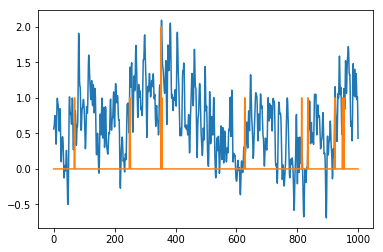

In [40]:
plt.plot(signal.values[1000:2000])
plt.plot(spikes_trains['1']['1'].values[1000:2000])

In [35]:
from scipy.signal import butter, lfilter
b, a = butter(5, 0.05)

def low_pass_butter(signal):
    signal[np.where(np.isnan(signal))] = 0
    return lfilter(b,a, signal)

In [12]:
from functions import deconvolve

In [41]:
predicted_spikes = {}
for dataset in ['1','2', '3', '4', '10']:
    predicted_spikes[dataset] = {}
    for run in calcium_trains[dataset]:
        filtered_calcium = low_pass_butter(calcium_trains[dataset][run].values)
        predicted_spikes[dataset][run] = deconvolve(calcium_trains[dataset][run].values - filtered_calcium)[1]
    print dataset, " corr: ", np.median(score(predicted_spikes[dataset],spikes_trains[dataset], method='corr'))

1  corr:  0.360552246325
2  corr:  0.31586573644
3  corr:  0.393841025906
4  corr:  0.206705242337
10  corr:  0.633938418815


In [42]:
predicted_spikes = {}
for dataset in ['1','2', '3', '4', '10']:
    predicted_spikes[dataset] = {}
    for run in calcium_trains[dataset]:
        predicted_spikes[dataset][run] = deconvolve(calcium_trains[dataset][run].values)[1]
    print dataset, " corr: ", np.median(score(predicted_spikes[dataset],spikes_trains[dataset], method='corr'))

1  corr:  0.296139208961
2  corr:  0.280102805483
3  corr:  0.329640334518
4  corr:  0.249715094223
10  corr:  0.561227385595


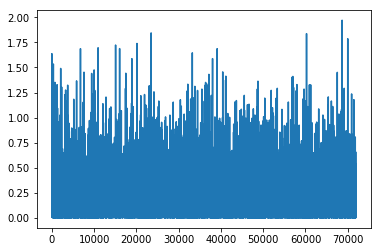

In [18]:

c,s,b,g,lam = deconvolve(signal.values - slp)
c2,s2,b2,g2,lam2 = deconvolve(signal.values)

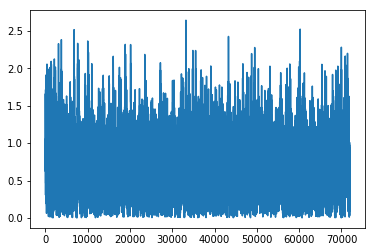

In [17]:
plt.plot(c2)

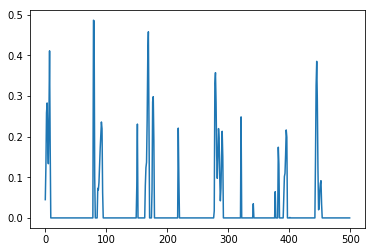

In [51]:
plt.plot(s[10000:10500])

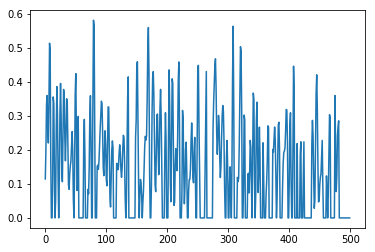

In [19]:
plt.plot(s2[10000:10500])

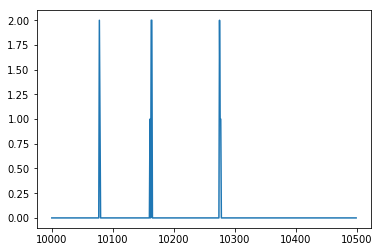

In [52]:
plt.plot(spikes_trains['1']['1'][10000:10500])

In [53]:
ds =[ (signal[i-5:i+5] - slp[i-5:i+5]).mean() for i in range(5,len(signal),10)]
ds_spikes = np.array([ spikes_trains['1']['1'][i-5:i+5].mean() for i in range(5,len(signal),10)])

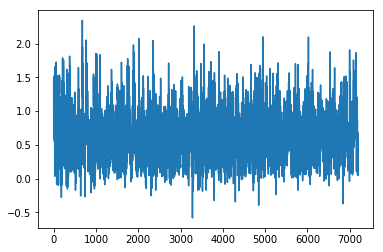

In [21]:
plt.plot(ds)

In [54]:
c,s,b,g,lam = deconvolve(np.array(ds),penalty=1)

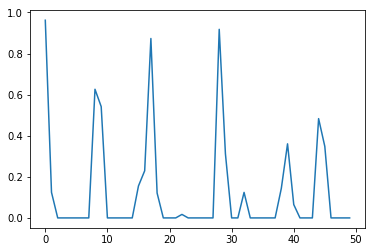

In [55]:
plt.plot(s[1000:1050])

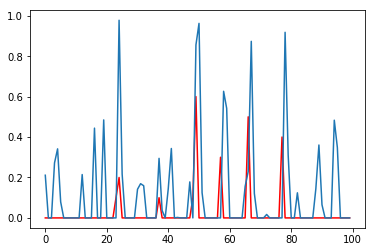

In [56]:
plt.plot(ds_spikes[950:1050],color='red')
plt.plot(s[950:1050])

In [20]:
from evaluate import score

In [21]:
from evaluate import nanmedian

ImportError: cannot import name nanmedian

In [23]:
spikes_trains.keys()

['10', '1', '3', '2', '5', '4', '7', '6', '9', '8']

In [27]:
for method in ['corr', 'rank', 'info', 'loglik']: 
    print(score({'1':spikes_trains['1']['1']}, {'1':s},method=method))

[0.23031606207512142]
[0.15530204496610367]


evaluate.py:142: UserWarning: Some firing rate predictions are smaller than zero.
  warn('Some firing rate predictions are smaller than zero.')


[1.4742682085850074]
[-9.1943966364081717]


In [28]:
for method in ['corr', 'rank', 'info', 'loglik']: 
    print(score({'1':spikes_trains['1']['1']}, {'1':s2},method=method))

[0.15473917932941758]
[0.13145702480641169]
[1.0056712302120321]
[-9.662993614781147]


In [29]:
for method in ['corr', 'rank', 'info', 'loglik']: 
    print(score({'1':s2}, {'1':s},method=method))

[0.64044006456907943]
[0.51366156878604174]


evaluate.py:117: RuntimeWarning: invalid value encountered in double_scalars
  return loglik, loglik + entropy


[nan]
[-inf]


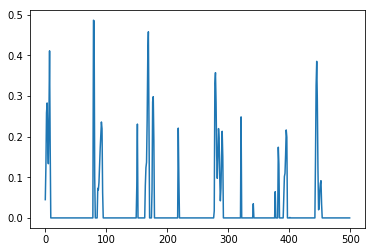

In [30]:
plt.plot(s[10000:10500])

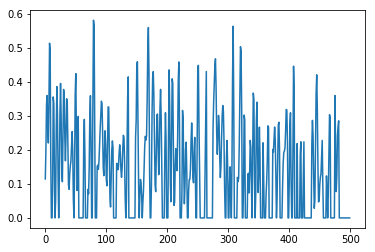

In [31]:
plt.plot(s2[10000:10500])

In [ ]:
for 